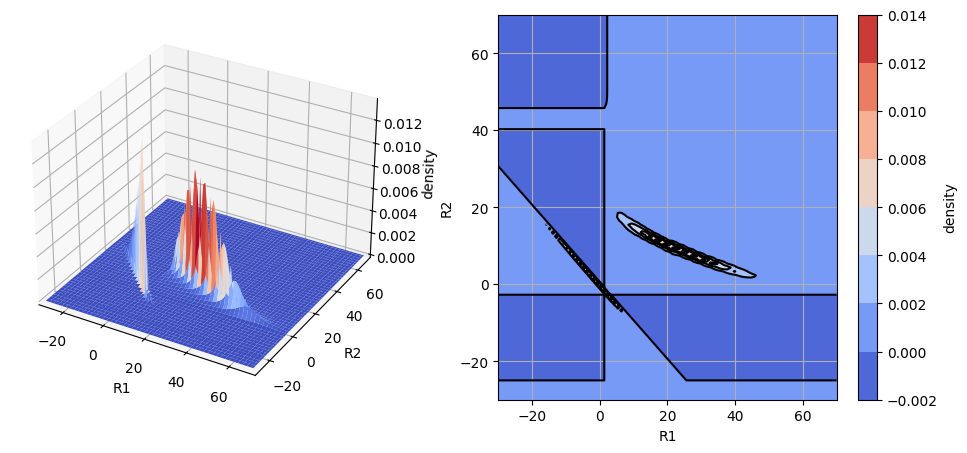

In [1]:
import numpy as np
from scipy.stats import norm
import cvxpy as cp
import matplotlib.pyplot as plt

mu1, mu2 = 8, 20
sigma1, sigma2 = 6, 17.5
rho = -0.25
mu = mu1 + mu2
sigma = np.sqrt(sigma1**2 + sigma2**2 + 2*rho*sigma1*sigma2)
ploss = norm.cdf(0, mu, sigma)

n = 100
rmin, rmax = -30, 70
r = np.linspace(rmin, rmax, n)

p1 = np.exp(-(r-mu1)**2 / (2*sigma1**2))
p1 /= np.sum(p1)

p2 = np.exp(-(r-mu2)**2 / (2*sigma2**2))
p2 /= np.sum(p2)

r1p, r2p = np.meshgrid(r, r)
loss_mask = (r1p + r2p <= 0)

P = cp.Variable((n, n))
obj = cp.Maximize(cp.sum(P[loss_mask]))
constraints = [P >= 0,
               cp.sum(P, axis=1) == p1,
               cp.sum(P, axis=0) == p2,
               (r - mu1) @ P @ (r - mu2) == rho*sigma1*sigma2]

prob = cp.Problem(obj, constraints)
prob.solve()

pmax = prob.value
P = P.value

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(r1p, r2p, P, cmap='coolwarm')
ax1.set_xlabel('R1')
ax1.set_ylabel('R2')
ax1.set_zlabel('density')
ax1.set_xlim(rmin, rmax)
ax1.set_ylim(rmin, rmax)

ax2 = fig.add_subplot(122)
cp1 = ax2.contourf(r1p, r2p, P, cmap='coolwarm')
ax2.contour(r1p, r2p, P, colors='k')
ax2.set_xlabel('R1')
ax2.set_ylabel('R2')
ax2.grid(True)
ax2.set_xlim(rmin, rmax)
ax2.set_ylim(rmin, rmax)
cbar = fig.colorbar(cp1)
cbar.set_label('density')
plt.show()